In [1]:
import numpy as np
# %matplotlib tk
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import scipy.signal

In [40]:
FILENAME = "recv_chirp_2.wav"
FS = 44100
FIG_LOCATION = "../interim_report_1/figures/"

In [3]:
CHIRP_DURATION = 3.0
t = np.linspace(0, CHIRP_DURATION, int(CHIRP_DURATION * FS), endpoint=False)
x = scipy.signal.chirp(t, f0=500, f1=4000, t1=CHIRP_DURATION, method='linear')

In [4]:
_, y = scipy.io.wavfile.read(FILENAME)
y = y / np.max(np.abs(y))

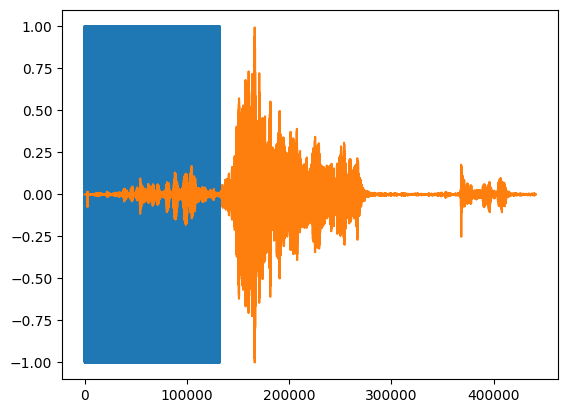

In [5]:
plt.plot(x)
plt.plot(y)

In [42]:
cross = np.correlate(x / np.sum(x ** 2), y)

In [7]:
print(x.shape, y.shape, cross.shape)

(132300,) (441000,) (308701,)


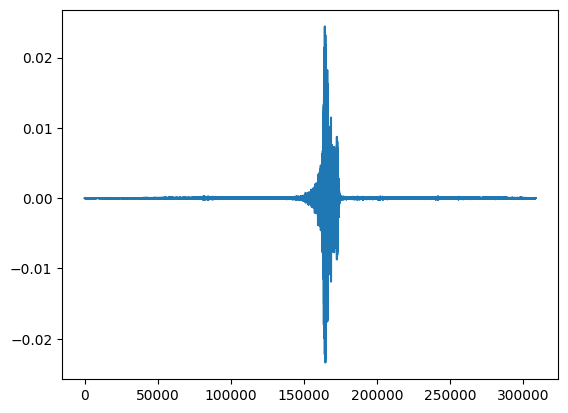

In [43]:
plt.plot(cross)

C:\Users\jonti\AppData\Local\Temp\ipykernel_20360\1357770106.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


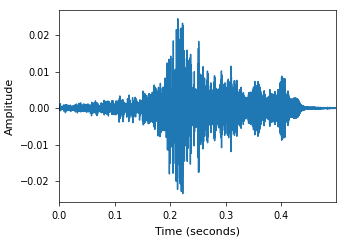

In [45]:
signal = cross[155000:177000]
with plt.style.context("style.mplstyle"):
    ax: plt.Axes
    fig, ax = plt.subplots()
    time = np.linspace(0, signal.size / FS, signal.size, endpoint=False)

    ax.plot()

    ax.plot(time, signal)
    ax.set_xlim(0, time[-1])
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Amplitude")
    ax.legend()

    fig.tight_layout()

    fig.savefig(FIG_LOCATION + "chirp_correlation.svg")

In [22]:
scipy.signal.find_peaks(np.abs(cross), height=1500, distance=200)

(array([164435, 164830]),
 {'peak_heights': array([1615.44388855, 1546.61851571])})

In [ ]:
max_index = np.argmax(np.abs(cross))
x_shifted = np.pad(x, (max_index - 20170, 0), "constant", constant_values=0)
x_shifted = np.pad(x_shifted, (0, (y.size - x_shifted.size)), "constant", constant_values=0)

In [18]:
print(np.sum(x_shifted * y))
print(np.max(np.abs(cross)))
print(max_index)
print(np.argmin(np.abs(cross - np.sum(x_shifted * y))))

1615.4438885508703
1615.4438885508705
164435
164435


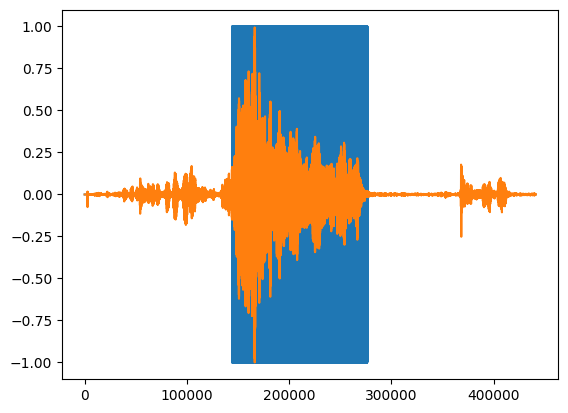

In [27]:
plt.plot(x_shifted)
plt.plot(y)

In [31]:
y_cropped = y[max_index:max_index+x.size]
print(np.sum(y_cropped * x))

2.983682997519155


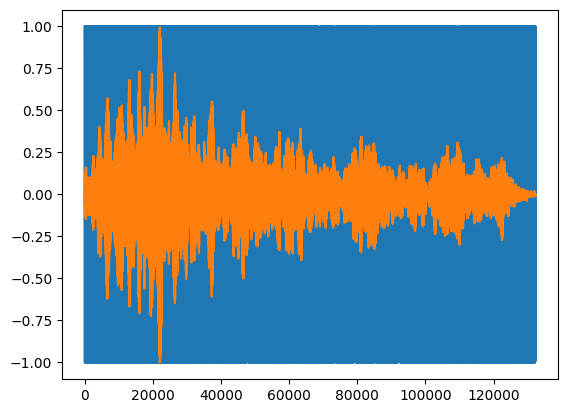

In [29]:
plt.plot(x)
plt.plot(y_cropped)